In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------


In [2]:
df_train = pd.read_csv('train.csv') 
df_test = pd.read_csv('test.csv') 

In [3]:
df_train.head(10)
df_train.shape
df_test.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C


(891, 12)

(418, 11)

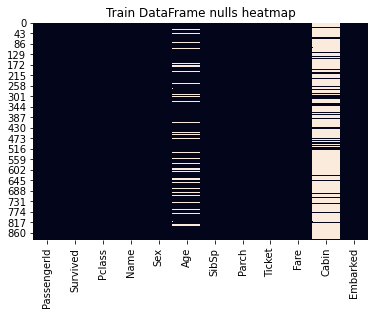

In [4]:
sns.heatmap(df_train.isnull(), cbar=False);
plt.title("Train DataFrame nulls heatmap");

In [5]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

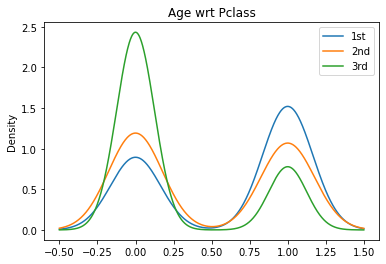

In [6]:
for x in [1,2,3]:    ## for 3 classes
    df_train.Survived[df_train.Pclass == x].plot(kind="kde");
plt.title("Age wrt Pclass");
plt.legend(("1st","2nd","3rd"));

In [7]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


In [8]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df_train.Survived.map({0:'Died',1: 'Survived'}).value_counts()

Died        549
Survived    342
Name: Survived, dtype: int64

In [10]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).sum()

,Sex,Survived
0,female,233
1,male,109


In [11]:
df_train.Age.isnull().sum()

177

In [12]:
df_train.Age.fillna(df_train.groupby("Sex")["Age"].transform("median"), inplace=True)
df_test.Age.fillna(df_train.groupby("Sex")["Age"].transform("median"), inplace=True)

In [13]:
df_train.Embarked.isnull().sum()
df_test.Embarked.isnull().sum()

df_train.Embarked.describe()

2

0

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [14]:
df_train.Embarked.fillna('S', inplace = True)

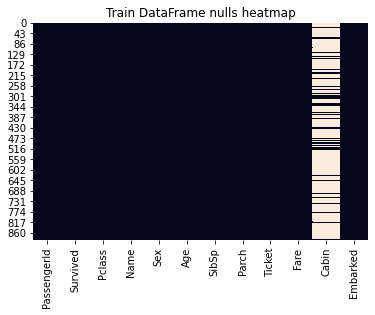

In [15]:
sns.heatmap(df_train.isnull(), cbar=False);
plt.title("Train DataFrame nulls heatmap");

In [16]:
df_train['Sex'] = df_train['Sex'].map({'male': 0,'female': 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0,'female': 1})

In [17]:
def dummies(df, col_list):
    df = pd.get_dummies(data=df, columns=col_list ,drop_first=False)
    return df

In [18]:
df_train_dummies = dummies(df_train, ['Embarked', 'Pclass'])
df_test_dummies = dummies(df_test, ['Embarked', 'Pclass'])

In [19]:
df_train_dummies.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",0,22.000,1,0,A/5 21171,7.250,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000,1,0,PC 17599,71.283,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000,1,0,113803,53.100,C123,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",0,35.000,0,0,373450,8.050,NaN,0,0,1,0,0,1


deleting features :

In [20]:
cols_remove = ["Name", "Ticket", "Cabin", "PassengerId"]
df_train_dummies = df_train_dummies.drop(columns=cols_remove)
df_test_dummies = df_test_dummies.drop(columns=cols_remove)

In [21]:
def split_train(df):
    X = df.copy().drop(columns=['Survived'])
    y = df['Survived'].copy()
    return X,y


In [22]:

def split_data(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=False ) 
    return X_train, X_test, y_train, y_test

In [23]:
X,y = split_train(df_train_dummies)



In [24]:
X_train, X_test, y_train, y_test = split_data(X, y)

y_train.shape
X_train.shape
X_test.shape
y_test.shape

(712,)

(712, 11)

(179, 11)

(179,)

In [25]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.000,1,0,7.250,0,0,1,0,0,1
1,1,38.000,1,0,71.283,1,0,0,1,0,0
2,1,26.000,0,0,7.925,0,0,1,0,0,1
3,1,35.000,1,0,53.100,0,0,1,1,0,0
4,0,35.000,0,0,8.050,0,0,1,0,0,1


In [26]:
def scale_data(X_train, X_test):
    # YOUR CODE HERE
    scaler = MinMaxScaler(feature_range=(0,1))
    minmax_X_train = X_train.copy()
    minmax_X_test = X_test.copy()

    for col in ["SibSp", "Parch","Age", "Fare"]:
        minmax_X_train[col] = scaler.fit_transform(X_train[[col]])
        minmax_X_test[col] = scaler.transform(X_test[[col]])
        
    return minmax_X_train, minmax_X_test
    

In [27]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
X_train_scaled.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0.268,0.125,0.000,0.014,0,0,1,0,0,1
1,1,0.470,0.125,0.000,0.139,1,0,0,1,0,0
2,1,0.319,0.000,0.000,0.015,0,0,1,0,0,1
3,1,0.432,0.125,0.000,0.104,0,0,1,1,0,0
4,0,0.432,0.000,0.000,0.016,0,0,1,0,0,1


In [28]:
def train_knn(X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn_clf = knn.fit(X_train_scaled, y_train)
    return knn_clf

In [29]:

knn_clf = train_knn(X_train_scaled, y_train)

print(knn_clf.score(X_test_scaled, y_test))


0.8212290502793296


In [44]:
clf = SGDClassifier(random_state = 42)

clf.fit(X_train_scaled,y_train)
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_test,y_pred)
clf_rep = metrics.classification_report(y_test,y_pred)
print(accuracy_score(y_test,y_pred))


SGDClassifier(random_state=42)

array([[105,  10],
       [ 18,  46]], dtype=int64)

0.8435754189944135


In [31]:
svclassifier = LinearSVC();
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)
# print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


LinearSVC()

0.8268156424581006


In [ ]:
from sklearn.metrics import make_scorer
f11 = make_scorer(f1_score , average='macro')


In [39]:
from sklearn.metrics import make_scorer
f11 = make_scorer(f1_score , average='accuracy')

parameters = {
    'random_state': [42],
    'loss': ['hinge','log','modified_huber','squared_hinge','perceptron','huber','epsilon_insensitive'],
#     'alpha': [0.0001,0.001,0.01,0.0011,0.005,0.006,0.03,0.1],
    'tol': [0.001,0.01,0.1,0.0001,0.005],
    'shuffle':[True, False],
    'learning_rate': ['constant','optimal','invscaling'],
    'eta0': [0.101,0.01,0.001,0.11]
}

SGDClassifier1 = GridSearchCV(SGDClassifier(), parameters, cv =5)
SGDClassifier1.fit(X_train_scaled,y_train)
predicted = SGDClassifier1.predict(X_test_scaled)
print(metrics.classification_report(y_test,predicted))

cv_res = pd.DataFrame(SGDClassifier1.cv_results_)
cv_res.head(10)


GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'eta0': [0.101, 0.01, 0.001, 0.11],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron', 'huber',
                                  'epsilon_insensitive'],
                         'random_state': [42], 'shuffle': [True, False],
                         'tol': [0.001, 0.01, 0.1, 0.0001, 0.005]})

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       115
           1       0.84      0.64      0.73        64

    accuracy                           0.83       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.83      0.83      0.82       179



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,param_learning_rate,param_loss,param_random_state,param_shuffle,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005,0.002,0.003,0.003,0.101,constant,hinge,42,True,0.001,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.797,0.776,0.824,0.782,0.768,0.789,0.020,27
1,0.003,0.003,0.005,0.004,0.101,constant,hinge,42,True,0.010,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.797,0.776,0.824,0.782,0.746,0.785,0.025,45
2,0.007,0.007,0.000,0.000,0.101,constant,hinge,42,True,0.100,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.797,0.769,0.810,0.782,0.746,0.781,0.022,206
3,0.003,0.006,0.003,0.006,0.101,constant,hinge,42,True,0.000,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.797,0.776,0.824,0.803,0.768,0.794,0.020,5
4,0.006,0.008,0.000,0.000,0.101,constant,hinge,42,True,0.005,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.797,0.776,0.824,0.782,0.746,0.785,0.025,45
5,0.003,0.007,0.000,0.000,0.101,constant,hinge,42,False,0.001,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.769,0.755,0.775,0.782,0.746,0.765,0.013,415
6,0.003,0.006,0.003,0.006,0.101,constant,hinge,42,False,0.010,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.755,0.755,0.768,0.775,0.746,0.760,0.010,431
7,0.000,0.000,0.003,0.006,0.101,constant,hinge,42,False,0.100,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.755,0.755,0.761,0.746,0.746,0.753,0.006,442
8,0.007,0.008,0.000,0.000,0.101,constant,hinge,42,False,0.000,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.769,0.755,0.775,0.775,0.746,0.764,0.011,420
9,0.003,0.006,0.000,0.000,0.101,constant,hinge,42,False,0.005,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.755,0.755,0.775,0.775,0.746,0.761,0.011,430


In [41]:
cv_res.head(10)

print('best params are:')
print(SGDClassifier1.best_params_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,param_learning_rate,param_loss,param_random_state,param_shuffle,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005,0.002,0.003,0.003,0.101,constant,hinge,42,True,0.001,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.797,0.776,0.824,0.782,0.768,0.789,0.020,27
1,0.003,0.003,0.005,0.004,0.101,constant,hinge,42,True,0.010,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.797,0.776,0.824,0.782,0.746,0.785,0.025,45
2,0.007,0.007,0.000,0.000,0.101,constant,hinge,42,True,0.100,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.797,0.769,0.810,0.782,0.746,0.781,0.022,206
3,0.003,0.006,0.003,0.006,0.101,constant,hinge,42,True,0.000,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.797,0.776,0.824,0.803,0.768,0.794,0.020,5
4,0.006,0.008,0.000,0.000,0.101,constant,hinge,42,True,0.005,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.797,0.776,0.824,0.782,0.746,0.785,0.025,45
5,0.003,0.007,0.000,0.000,0.101,constant,hinge,42,False,0.001,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.769,0.755,0.775,0.782,0.746,0.765,0.013,415
6,0.003,0.006,0.003,0.006,0.101,constant,hinge,42,False,0.010,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.755,0.755,0.768,0.775,0.746,0.760,0.010,431
7,0.000,0.000,0.003,0.006,0.101,constant,hinge,42,False,0.100,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.755,0.755,0.761,0.746,0.746,0.753,0.006,442
8,0.007,0.008,0.000,0.000,0.101,constant,hinge,42,False,0.000,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.769,0.755,0.775,0.775,0.746,0.764,0.011,420
9,0.003,0.006,0.000,0.000,0.101,constant,hinge,42,False,0.005,"{'eta0': 0.101, 'learning_rate': 'constant', '...",0.755,0.755,0.775,0.775,0.746,0.761,0.011,430


best params are:
{'eta0': 0.11, 'learning_rate': 'invscaling', 'loss': 'log', 'random_state': 42, 'shuffle': True, 'tol': 0.001}
